# Exemplos ajustes de curvas 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # importando as bibliotecas necessárias

# Exemplo 1 - Parábolas

In [4]:
x = np.linspace(-5,5,50)

def parabola(x,a,b,c):
    return a*x**2 + b*x + c

y = parabola(x,1,3,-4) + 1.5 * np.random.randn(len(x))

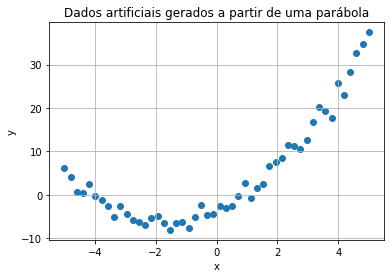

In [5]:
plt.scatter(x,y)
plt.title("Dados artificiais gerados a partir de uma parábola")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

## Ajustando a melhor curva de dados

In [10]:
p_opt, p_cov = curve_fit(parabola, x, y)

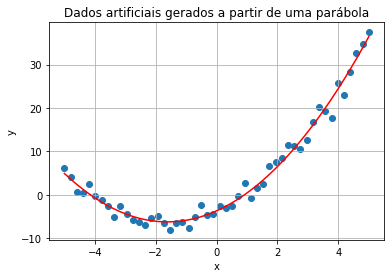

In [7]:
plt.scatter(x,y)
plt.plot(x,parabola(x,*p_opt), c='red')
plt.title("Dados artificiais gerados a partir de uma parábola")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [8]:
print('Melhor ajuste obtido com os parâmetros: \n \n', 
      'a =',  p_opt[0], '\n',
      'b =',  p_opt[1], '\n',
      'c =',  p_opt[2], '\n') 

Melhor ajuste obtido com os parâmetros: 
 
 a = 0.9755166091314471 
 b = 3.1536791956054784 
 c = -3.7277661702740477 



In [9]:
print('Erros nos parâmetros ajustados são obtidos dos elementos diagonais da matriz de covariância: \n')
print('σ_a = ', np.sqrt(p_cov[0,0]))
print('σ_b = ', np.sqrt(p_cov[1,1]))
print('σ_c = ', np.sqrt(p_cov[2,2]))

Erros nos parâmetros ajustados são obtidos dos elementos diagonais da matriz de covariância: 

σ_a =  0.02847977878961942
σ_b =  0.07497512360734254
σ_c =  0.33132165751848686


## Algumas vezes é necessário dar um bom "chute inicial" nos parâmetros de ajuste:

In [11]:
p_opt, p_cov = curve_fit(parabola, x, y, p0=[1.1, 3.1, -4.1])  
#  A lista p0 contém os chutes iniciais, essenciais no caso de ajustes não lineares.

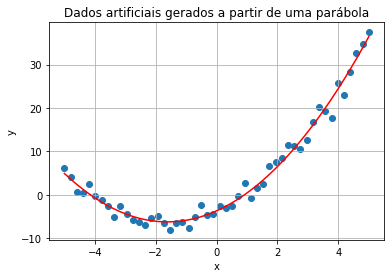

In [12]:
plt.scatter(x,y)
plt.plot(x,parabola(x,*p_opt), c='red')
plt.title("Dados artificiais gerados a partir de uma parábola")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [13]:
print('Melhor ajuste obtido com os parâmetros: \n \n', 
      'a =',  p_opt[0], '\n',
      'b =',  p_opt[1], '\n',
      'c =',  p_opt[2], '\n') 

Melhor ajuste obtido com os parâmetros: 
 
 a = 0.975516608306672 
 b = 3.1536791975250993 
 c = -3.727766176470877 



In [14]:
print('Erros nos parâmetros ajustados são obtidos dos elementos diagonais da matriz de covariância: \n')
print('σ_a = ', np.sqrt(p_cov[0,0]))
print('σ_b = ', np.sqrt(p_cov[1,1]))
print('σ_c = ', np.sqrt(p_cov[2,2]))

Erros nos parâmetros ajustados são obtidos dos elementos diagonais da matriz de covariância: 

σ_a =  0.02847977869153823
σ_b =  0.07497512400477774
σ_c =  0.3313216566443357


# Exemplo 2 - Gaussiana

$$ f(x; \mu; \sigma)  = \frac{1}{\sqrt{2\pi} \sigma} \mathrm e^{-\left( \frac{(x-\mu)^2}{2\sigma^2} \right) } $$

In [15]:
def gaussiana(x,mu=0.0, sigma=1.0):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi) * sigma)

x = np.linspace(-4,4,50)

mu = 0.0
sigma = 1.0
erros_y =  0.005 * np.random.randn(len(x))
y = gaussiana(x, mu, sigma) + 0.005 * np.random.randn(len(x))  #Gaussiana e ruído aleatório 

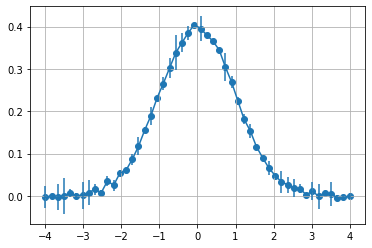

In [17]:
plt.scatter(x,y)
plt.errorbar(x,y, 4 * erros_y)
plt.grid()

In [18]:
p_opt, p_cov = curve_fit(gaussiana, x, y, p0=[2, 3], sigma = erros_y)

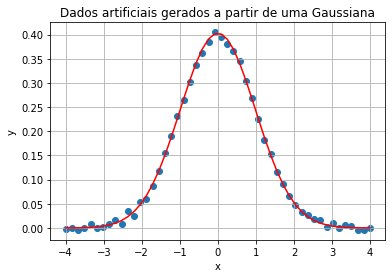

In [19]:
plt.scatter(x,y)
plt.plot(x,gaussiana(x,*p_opt), c='red')
plt.title("Dados artificiais gerados a partir de uma Gaussiana")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [20]:
print('Melhor ajuste obtido com os parâmetros: \n \n', 
      'mu =',  p_opt[0], '\n',
      'sigma =',  p_opt[1], '\n') 

Melhor ajuste obtido com os parâmetros: 
 
 mu = -0.0006969012563108553 
 sigma = 0.9906435224444584 



In [21]:
print('Erros nos parâmetros ajustados são obtidos dos elementos diagonais da matriz de covariância: \n')
print('σ_μ =', np.sqrt(p_cov[0,0]))
print('σ_σ =', np.sqrt(p_cov[1,1]))

Erros nos parâmetros ajustados são obtidos dos elementos diagonais da matriz de covariância: 

σ_μ = 0.0027834919598037924
σ_σ = 0.0022714691247934893


# Exemplo 3 - Função trigonométrica x exponencial

$$ f(t)= A \mathrm e^{(-t/\tau)} \times cos(\omega t + \phi)  $$

In [22]:
def amortecimento(t,A,omega, phi, tau):
    return A * np.cos(omega * t + phi) * np.exp(-t/tau)

t = np.linspace(0,40,200)

A = 2.0
omega = 2.0
phi = 0.0
tau = 6.0
noise = 0.25 * (np.random.random(len(t)) - 0.5)
dados = amortecimento(t,A,omega,phi,tau) + noise

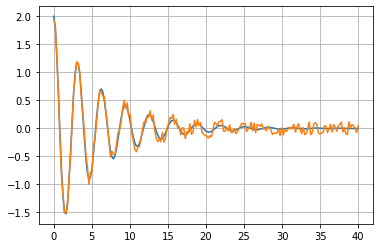

In [23]:
plt.plot(t, amortecimento(t,A,omega,phi,tau))
plt.plot(t,dados)
plt.grid()

In [24]:
p_opt, p_cov =  curve_fit(amortecimento, t, dados, p0=[6, 6, 0.0, 10.0])

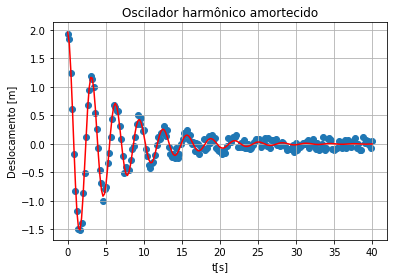

In [25]:
plt.scatter(t,dados)
plt.plot(t,amortecimento(t,*p_opt), c='red')
plt.title("Oscilador harmônico amortecido")
plt.xlabel('t[s]')
plt.ylabel('Deslocamento [m]')
plt.grid()

In [26]:
print('Melhor ajuste obtido com os parâmetros: \n \n', 
      'A =',  p_opt[0], '\n',
      'Omega =',  p_opt[1], '\n',
      'Phi =',    p_opt[2], '\n',
      'Tau =',    p_opt[3], '\n') 

Melhor ajuste obtido com os parâmetros: 
 
 A = 1.9596157886543695 
 Omega = 2.0027894146702474 
 Phi = -0.006366739473956093 
 Tau = 6.199918613408287 



In [27]:
#Note que os valores da amplitude e da fase  estão incorretos! 
# Cuidado com escolha dos valores iniciais!

In [28]:
print(p_cov[0,2]/np.sqrt((p_cov[0,0] * p_cov[2,2])))

0.1389108259300401
